In [4]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


20:05:52 - cmdstanpy - INFO - Chain [1] start processing
20:05:53 - cmdstanpy - INFO - Chain [1] done processing


             ds          yhat    yhat_lower    yhat_upper
1911 2018-03-27  27581.117714  26096.190484  29084.537244
1912 2018-03-28  27778.783817  26327.462451  29230.302515
1913 2018-03-29  29588.942755  28124.359974  31067.279005
1914 2018-03-30  31444.979494  29941.089496  32888.921708
1915 2018-03-31  33342.686869  31889.758292  34725.855648


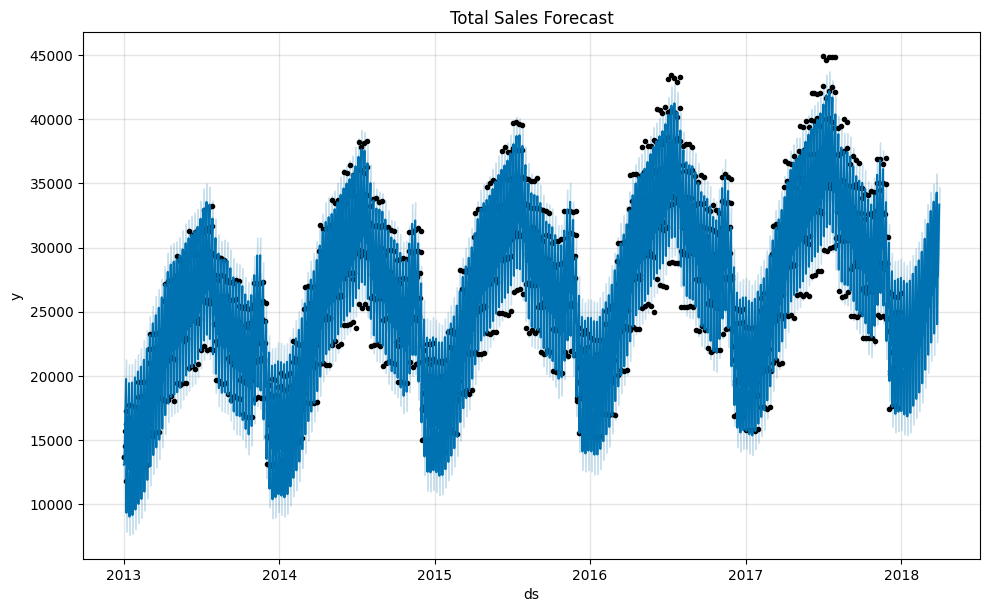

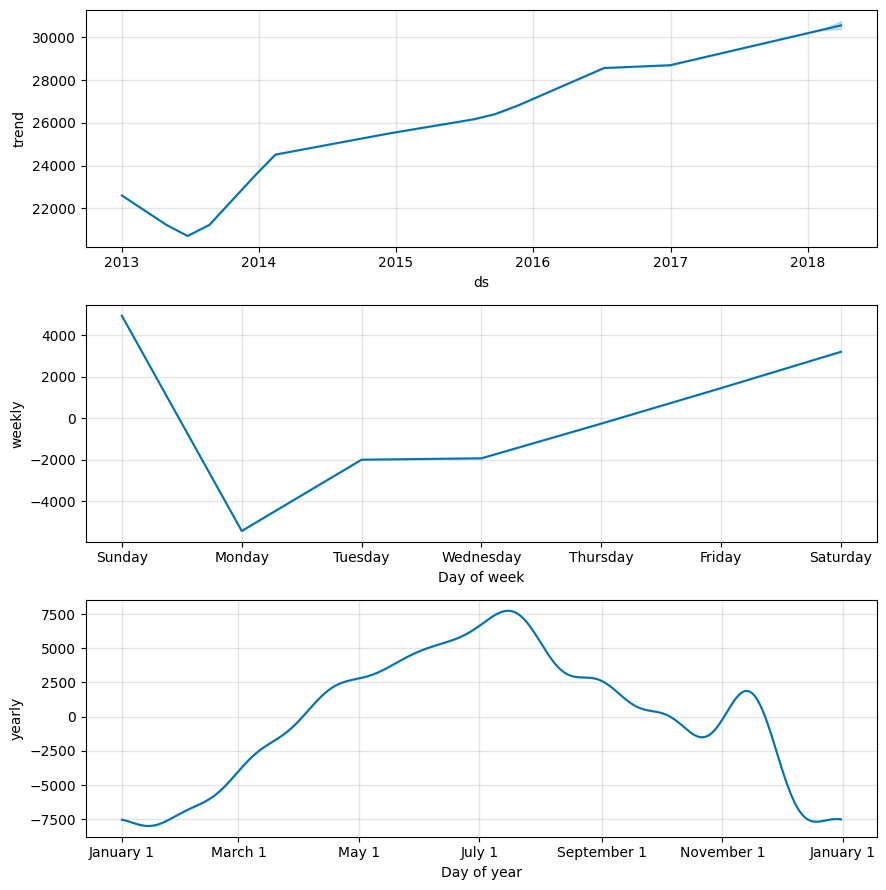

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 📂 Load dataset from raw folder
df = pd.read_csv("../data/raw/train.csv", parse_dates=["date"])

# 🔎 Prepare data for Prophet
df_prophet = df.groupby("date")["sales"].sum().reset_index()
df_prophet.columns = ["ds", "y"]

# 🤖 Fit Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_prophet)

# ⏳ Forecast next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# 💾 Save forecast results
forecast.to_csv("../data/processed/forecast.csv", index=False)

# 📊 Show forecast preview
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail())

# 📈 Plot forecast
fig1 = model.plot(forecast)
plt.title("Total Sales Forecast")
plt.show()

# 📉 Plot forecast components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.show()
